<a href="https://colab.research.google.com/github/Yemiakintola/students-performance-predictor/blob/main/Student_performance_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STUDENTS PERFORMANCE PREDICTOR**

Project Goal:

The main goal of this project is to develop a predictive model for student performance, specifically focusing on GPA. This is evident from the data loading, exploration, and modeling steps centered around the 'GPA' variable.

Justifications:

Understanding Factors Influencing Student Performance: The project aims to identify and understand the key factors that influence student performance. By analyzing the dataset and building predictive models, insights can be gained into the relationship between various features (e.g., study time, absences, parental education) and GPA. This information is valuable for educators and policymakers to make informed decisions to improve student outcomes.

Predictive Capability: The project aims to develop a model that can accurately predict student GPA based on their characteristics and behaviors. This predictive capability can be used for early identification of students who might be at risk of academic difficulties, allowing for timely intervention and support. It can also assist in personalized learning approaches by tailoring educational resources and strategies based on individual student predictions.

Data-Driven Decision Making: The project emphasizes a data-driven approach to understanding and improving student performance. By using statistical analysis, machine learning techniques, and data visualization, the project provides evidence-based insights for educators and stakeholders to make informed decisions about educational strategies and policies.

Continuous Improvement: The project encourages ongoing evaluation and refinement of the predictive models. By monitoring model performance and incorporating new data, the project can be adapted to changing student populations and educational environments. This iterative approach ensures the models remain relevant and effective over time.

Evidence from the Code:

Data Exploration: The code includes extensive data exploration steps, including descriptive statistics, distributions, and relationships between features, to gain an initial understanding of the data and identify potential predictors of GPA.
Feature Engineering: The creation of interaction and polynomial features demonstrates an effort to improve model accuracy by capturing complex relationships between variables.
Model Training and Optimization: The use of multiple regression models and hyperparameter optimization techniques reflects a rigorous approach to building the best possible predictive model.
Model Evaluation: The evaluation of models on the test set using metrics like MSE and R2 score ensures the model's generalizability and predictive accuracy.

Import the neccessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import numpy as np

Read the dataset into pandas

In [ ]:
df = pd.read_csv('/content/Student_performance_data _.csv')

Peep into the data

In [ ]:
display(df.head())
print(df.shape)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


(2392, 15)


Explore the data for better undertanding with some histogram plots showing the distribution of student performance scores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None
         StudentID 

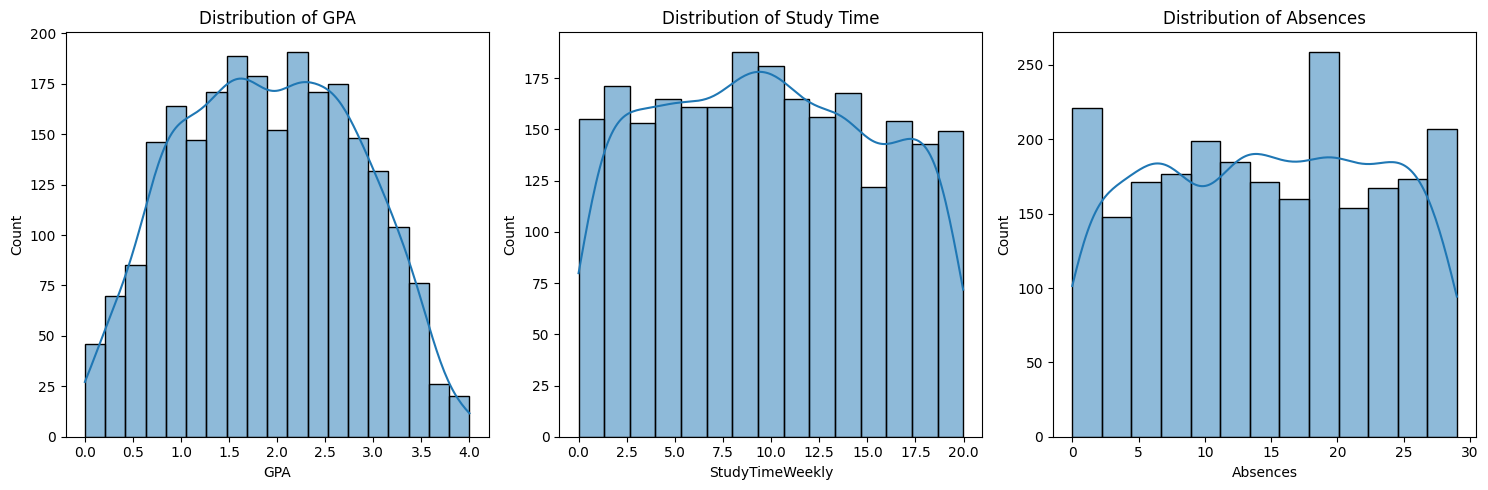

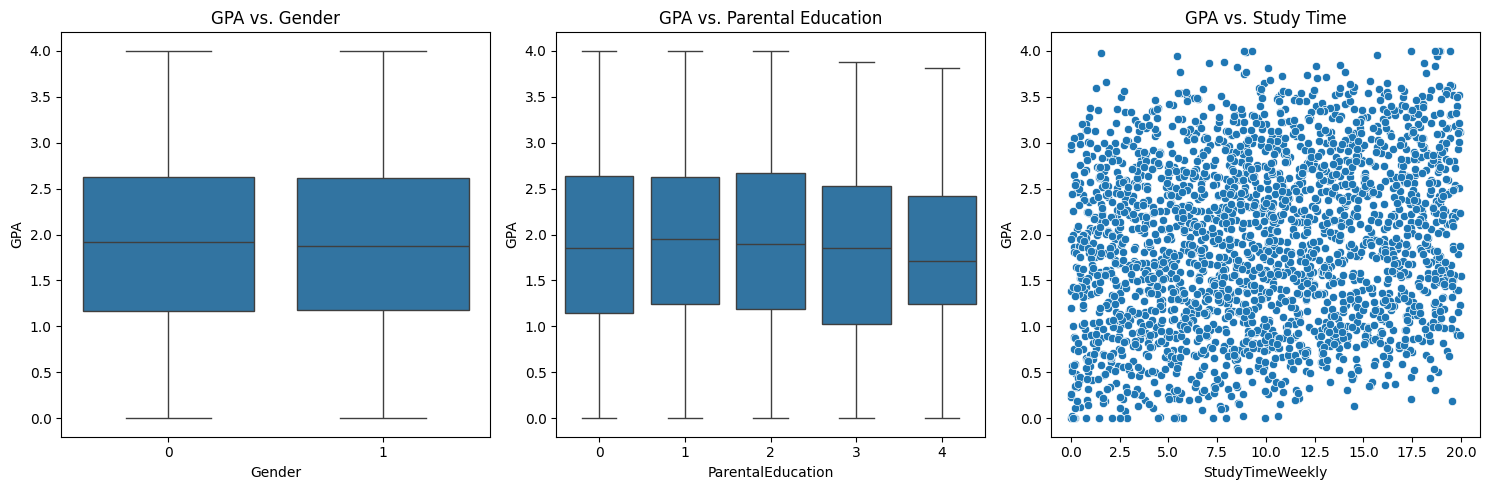

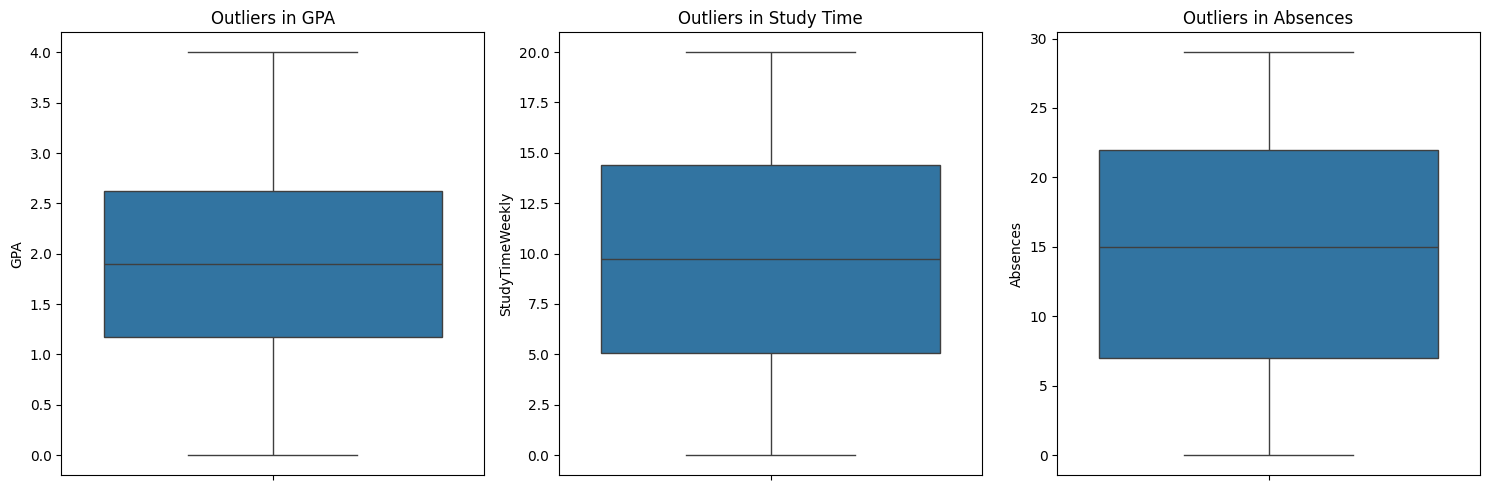

In [ ]:
# Data types and descriptive statistics
print(df.info())
print(df.describe())

# Distributions of student performance scores
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['GPA'], kde=True)
plt.title('Distribution of GPA')

plt.subplot(1, 3, 2)
sns.histplot(df['StudyTimeWeekly'], kde=True)
plt.title('Distribution of Study Time')

plt.subplot(1, 3, 3)
sns.histplot(df['Absences'], kde=True)
plt.title('Distribution of Absences')

plt.tight_layout()
plt.show()

# Relationships between performance and other features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='GPA', data=df)
plt.title('GPA vs. Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='ParentalEducation', y='GPA', data=df)
plt.title('GPA vs. Parental Education')

plt.subplot(1, 3, 3)
sns.scatterplot(x='StudyTimeWeekly', y='GPA', data=df)
plt.title('GPA vs. Study Time')

plt.tight_layout()
plt.show()


# Identify potential outliers
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['GPA'])
plt.title('Outliers in GPA')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['StudyTimeWeekly'])
plt.title('Outliers in Study Time')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Absences'])
plt.title('Outliers in Absences')

plt.tight_layout()
plt.show()

Data cleaning: Identify missing values, handle outliers seen in the boxplots and check for inconsistences in the categorical columns

In [ ]:
# Identify missing values
print(df.isnull().sum())

# Handle outliers in 'GPA', 'StudyTimeWeekly', and 'Absences' using winsorizing
for col in ['GPA', 'StudyTimeWeekly', 'Absences']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Check for inconsistencies in categorical features
for col in ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']:
    print(f"Unique values for {col}: {df[col].unique()}")
    # Further inspection may be needed to handle inconsistencies based on the observed unique values

# Verify the cleaning steps
print(df.isnull().sum())
print(df.describe())
display(df.head())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64
Unique values for Gender: [1 0]
Unique values for Ethnicity: [0 2 1 3]
Unique values for ParentalEducation: [2 1 3 4 0]
Unique values for Tutoring: [1 0]
Unique values for ParentalSupport: [2 1 3 4 0]
Unique values for Extracurricular: [0 1]
Unique values for Sports: [0 1]
Unique values for Music: [1 0]
Unique values for Volunteering: [0 1]
Unique values for GradeClass: [2. 1. 4. 3. 0.]
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Verify the cleaning measure taken

In [ ]:
# Further inspection of categorical features and handling inconsistencies
# GradeClass: 0 seems out of range.
df['GradeClass'] = df['GradeClass'].replace(0, df['GradeClass'].mode()[0])

# Verify the changes again
print(df.isnull().sum())
print(df.describe())
display(df.head())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64
         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
ma

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Identify categorical and numerical features, then encode categorical features using one-hot encoding for features with more than two unique values and label encoding for binary features. Finally, scale numerical features using standardization

In [ ]:
# Identify categorical and numerical features
categorical_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']
numerical_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

# Encode categorical features
df_encoded = df.copy()
for col in categorical_cols:
    if len(df[col].unique()) > 2:
        # Use one-hot encoding for features with more than two unique values
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        encoded_data = ohe.fit_transform(df_encoded[[col]])
        encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out([col]))
        df_encoded = pd.concat([df_encoded, encoded_df], axis=1).drop(col, axis=1)
    else:
        # Use label encoding for binary features
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Scale numerical features
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Combine encoded and scaled features
df_prepared = df_scaled

display(df_prepared.head())

,StudentID,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,...,ParentalEducation_4,ParentalSupport_0,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4,GradeClass_1.0,GradeClass_2.0,GradeClass_3.0,GradeClass_4.0
0,1001,0.472919,1,1.780336,-0.890822,1,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1002,1.362944,0,0.997376,-1.717694,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1003,-1.307132,0,-0.984045,1.353542,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1004,0.472919,1,0.045445,-0.063951,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1005,0.472919,1,-0.902311,0.290422,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


 Create interaction and polynomial features based on the existing features in df_prepared and add them as new columns to the dataframe.

In [ ]:
# Create interaction features
df_prepared['GPA_StudyTime_Interaction'] = df_prepared['GPA'] * df_prepared['StudyTimeWeekly']
df_prepared['GPA_Absences_Interaction'] = df_prepared['GPA'] * df_prepared['Absences']

# Create polynomial features
df_prepared['GPA_Squared'] = df_prepared['GPA'] ** 2
df_prepared['StudyTimeWeekly_Squared'] = df_prepared['StudyTimeWeekly'] ** 2

# Document the new features
print("New features added to df_prepared:")
print("- GPA_StudyTime_Interaction: Interaction between GPA and StudyTimeWeekly.")
print("- GPA_Absences_Interaction: Interaction between GPA and Absences.")
print("- GPA_Squared: Square of GPA.")
print("- StudyTimeWeekly_Squared: Square of StudyTimeWeekly.")

# Display first few rows to show the new features
display(df_prepared.head())

New features added to df_prepared:
- GPA_StudyTime_Interaction: Interaction between GPA and StudyTimeWeekly.
- GPA_Absences_Interaction: Interaction between GPA and Absences.
- GPA_Squared: Square of GPA.
- StudyTimeWeekly_Squared: Square of StudyTimeWeekly.


,StudentID,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,...,ParentalSupport_3,ParentalSupport_4,GradeClass_1.0,GradeClass_2.0,GradeClass_3.0,GradeClass_4.0,GPA_StudyTime_Interaction,GPA_Absences_Interaction,GPA_Squared,StudyTimeWeekly_Squared
0,1001,0.472919,1,1.780336,-0.890822,1,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.990569,-0.996016,1.250117,3.169595
1,1002,1.362944,0,0.997376,-1.717694,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.239115,-2.134019,1.543494,0.994759
2,1003,-1.307132,0,-0.984045,1.353542,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.929001,-2.653318,3.842687,0.968345
3,1004,0.472919,1,0.045445,-0.063951,0,1,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.007353,-0.010347,0.026176,0.002065
4,1005,0.472919,1,-0.902311,0.290422,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.609577,-0.196201,0.456399,0.814166


Split the data into training and testing sets using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X = df_prepared.drop(['GPA'], axis=1)
y = df_prepared['GPA']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1913, 32)
X_test shape: (479, 32)
y_train shape: (1913,)
y_test shape: (479,)


Train multiple regression models on the training data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
linear_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()

# Train models
linear_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)

# Make predictions
linear_pred = linear_reg.predict(X_train)
tree_pred = tree_reg.predict(X_train)
forest_pred = forest_reg.predict(X_train)

# Evaluate models
linear_mse = mean_squared_error(y_train, linear_pred)
linear_r2 = r2_score(y_train, linear_pred)

tree_mse = mean_squared_error(y_train, tree_pred)
tree_r2 = r2_score(y_train, tree_pred)

forest_mse = mean_squared_error(y_train, forest_pred)
forest_r2 = r2_score(y_train, forest_pred)

print(f"Linear Regression - Training MSE: {linear_mse:.4f}, R2: {linear_r2:.4f}")
print(f"Decision Tree Regression - Training MSE: {tree_mse:.4f}, R2: {tree_r2:.4f}")
print(f"Random Forest Regression - Training MSE: {forest_mse:.4f}, R2: {forest_r2:.4f}")

Linear Regression - Training MSE: 0.0446, R2: 0.9555
Decision Tree Regression - Training MSE: 0.0000, R2: 1.0000
Random Forest Regression - Training MSE: 0.0005, R2: 0.9995


Optimize the hyperparameters of the three regression models using GridSearchCV and cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import mean_squared_error

# Define parameter grids (same as before)
param_grid_linear = {}

param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use a lambda function to create a scorer
scoring = make_scorer(lambda y_true, y_pred: -mean_squared_error(y_true, y_pred))

# Initialize and fit GridSearchCV objects (same as before)
grid_search_linear = GridSearchCV(linear_reg, param_grid_linear, cv=5, scoring=scoring)
grid_search_tree = GridSearchCV(tree_reg, param_grid_tree, cv=5, scoring=scoring)
grid_search_forest = GridSearchCV(forest_reg, param_grid_forest, cv=5, scoring=scoring)

grid_search_linear.fit(X_train, y_train)
grid_search_tree.fit(X_train, y_train)
grid_search_forest.fit(X_train, y_train)

# Print results (same as before)
print("Linear Regression:")
print("Best Hyperparameters:", grid_search_linear.best_params_)
print("Best Score (neg_mean_squared_error):", grid_search_linear.best_score_)

print("\nDecision Tree Regression:")
print("Best Hyperparameters:", grid_search_tree.best_params_)
print("Best Score (neg_mean_squared_error):", grid_search_tree.best_score_)

print("\nRandom Forest Regression:")
print("Best Hyperparameters:", grid_search_forest.best_params_)
print("Best Score (neg_mean_squared_error):", grid_search_forest.best_score_)

# Store best models (same as before)
best_linear_reg = grid_search_linear.best_estimator_
best_tree_reg = grid_search_tree.best_estimator_
best_forest_reg = grid_search_forest.best_estimator_

Linear Regression:
Best Hyperparameters: {}
Best Score (neg_mean_squared_error): -0.04610521975897667

Decision Tree Regression:
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score (neg_mean_squared_error): -0.005165692907684326

Random Forest Regression:
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score (neg_mean_squared_error): -0.0033882617698221375


Evaluate the performance of the best models on the test set by predicting on X_test and calculating MSE and R2 scores

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
linear_pred_test = best_linear_reg.predict(X_test)
tree_pred_test = best_tree_reg.predict(X_test)
forest_pred_test = best_forest_reg.predict(X_test)

# Evaluate models on the test set
linear_mse_test = mean_squared_error(y_test, linear_pred_test)
linear_r2_test = r2_score(y_test, linear_pred_test)

tree_mse_test = mean_squared_error(y_test, tree_pred_test)
tree_r2_test = r2_score(y_test, tree_pred_test)

forest_mse_test = mean_squared_error(y_test, forest_pred_test)
forest_r2_test = r2_score(y_test, forest_pred_test)

print(f"Linear Regression - Test MSE: {linear_mse_test:.4f}, R2: {linear_r2_test:.4f}")
print(f"Decision Tree Regression - Test MSE: {tree_mse_test:.4f}, R2: {tree_r2_test:.4f}")
print(f"Random Forest Regression - Test MSE: {forest_mse_test:.4f}, R2: {forest_r2_test:.4f}")

Linear Regression - Test MSE: 0.0455, R2: 0.9540
Decision Tree Regression - Test MSE: 0.0171, R2: 0.9827
Random Forest Regression - Test MSE: 0.0098, R2: 0.9901


Visualize the performance of the three regression models and explore key relationships in the data, as per the user's request

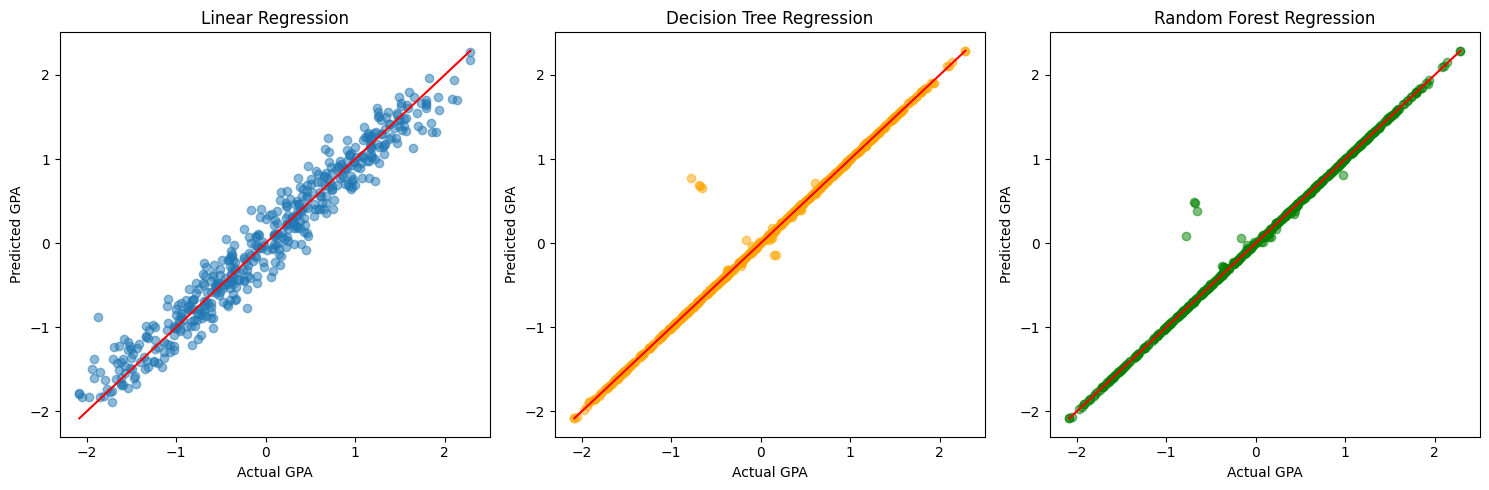

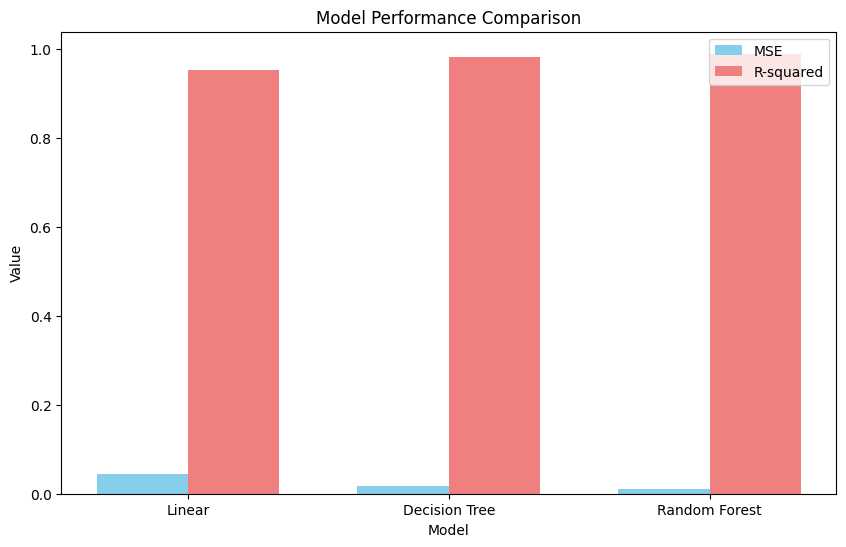

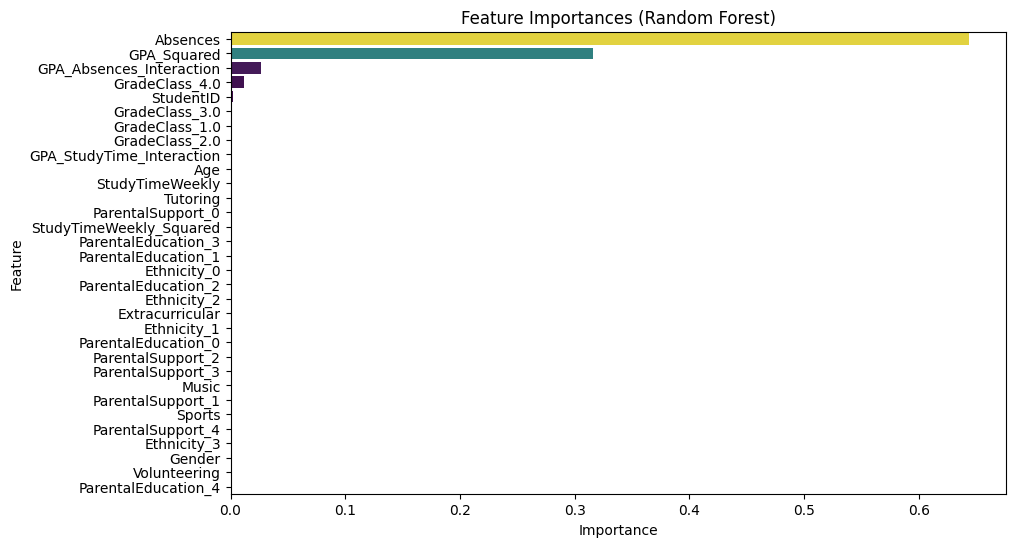

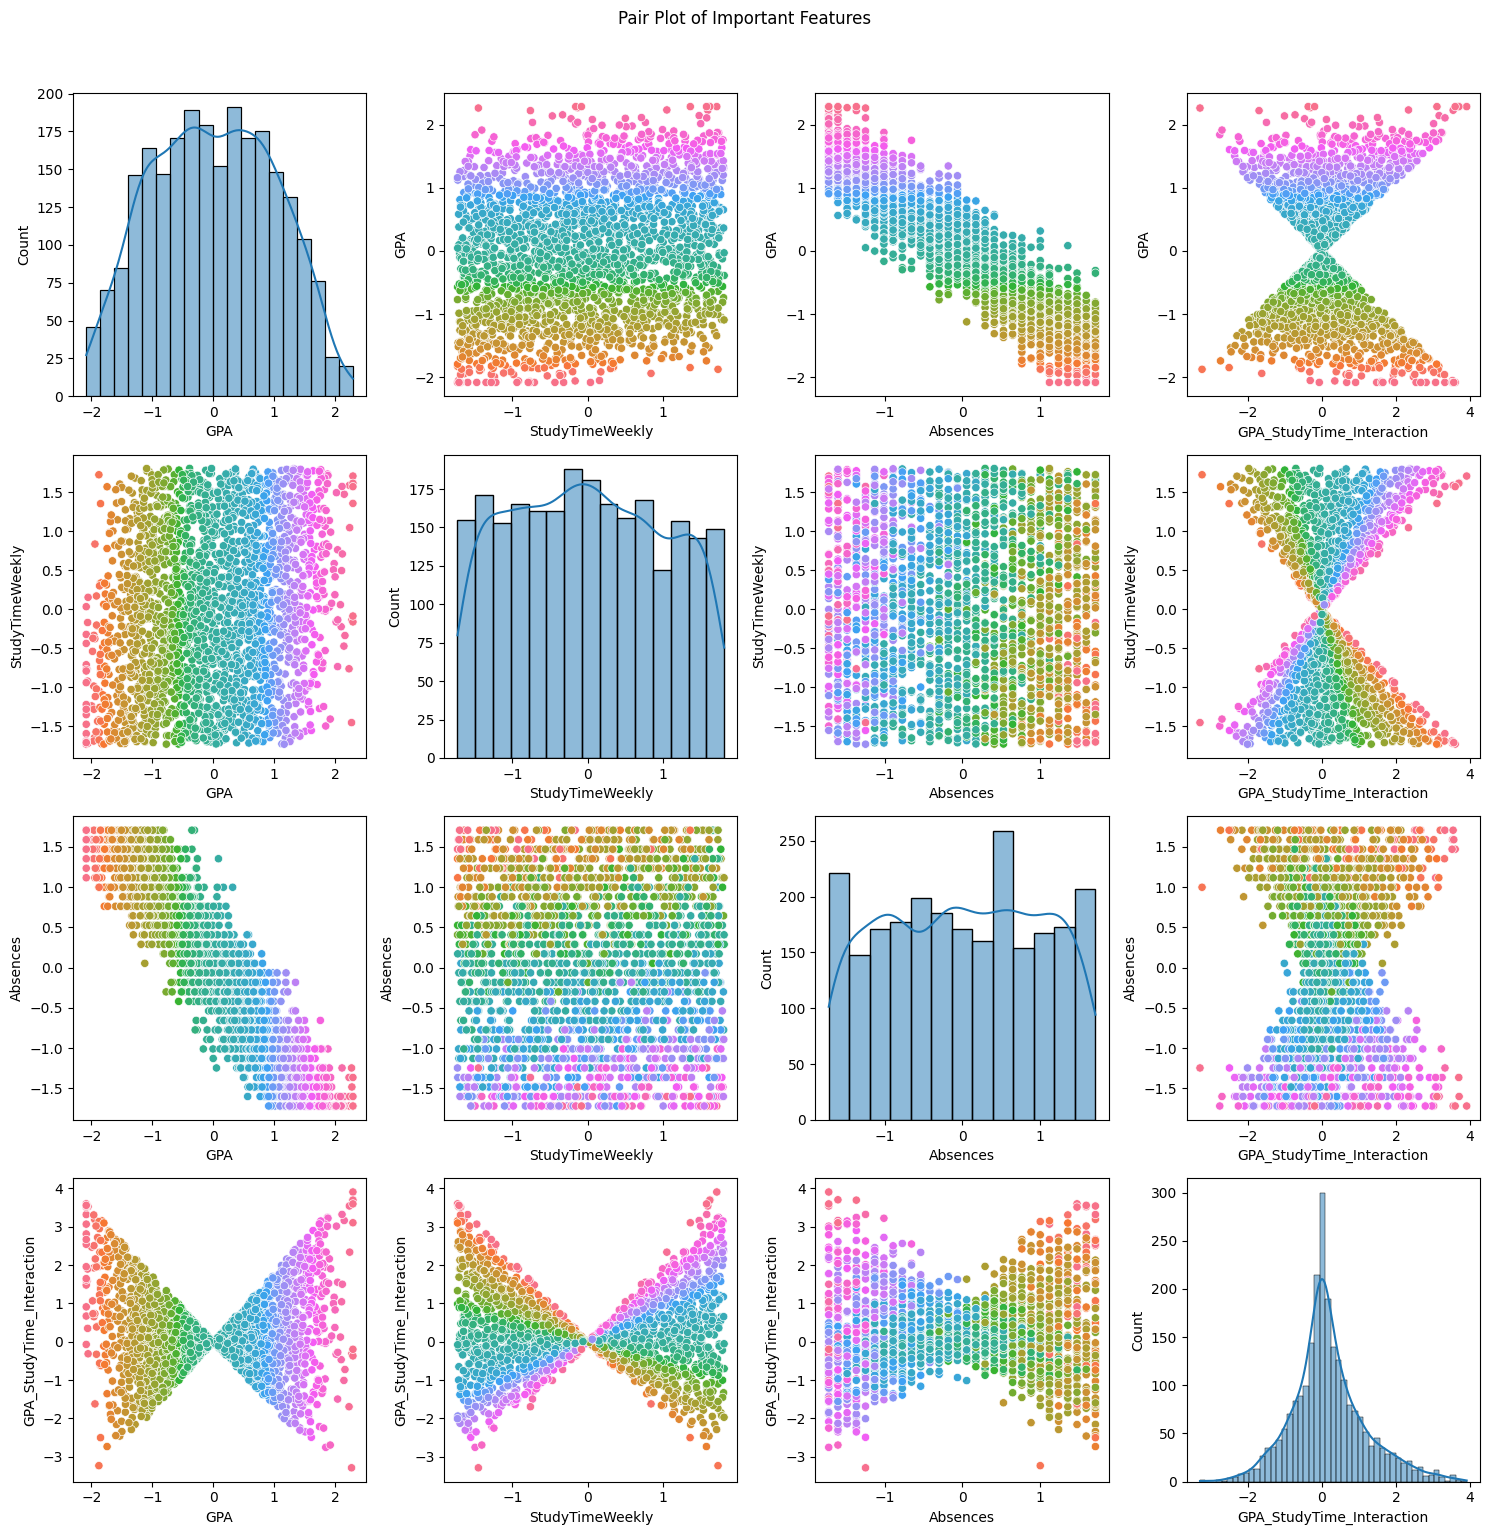

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Scatter plots of predicted vs. actual GPA
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Linear Regression')

plt.subplot(1, 3, 2)
plt.scatter(y_test, tree_pred_test, alpha=0.5, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Decision Tree Regression')

plt.subplot(1, 3, 3)
plt.scatter(y_test, forest_pred_test, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Random Forest Regression')

plt.tight_layout()
plt.show()


# 2. Bar chart comparing MSE and R-squared
mse_values = [linear_mse_test, tree_mse_test, forest_mse_test]
r2_values = [linear_r2_test, tree_r2_test, forest_r2_test]
models = ['Linear', 'Decision Tree', 'Random Forest']
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, mse_values, width, label='MSE', color='skyblue')
plt.bar(x + width / 2, r2_values, width, label='R-squared', color='lightcoral')
plt.xticks(x, models)
plt.xlabel("Model")
plt.ylabel("Value")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()


# 3. Feature importances for Random Forest
feature_importances = best_forest_reg.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue='Importance', legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.show()

# 4. Pair plot (manual creation)
important_features = ['GPA', 'StudyTimeWeekly', 'Absences', 'GPA_StudyTime_Interaction']
num_features = len(important_features)
fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))
fig.suptitle('Pair Plot of Important Features', y=1.02)

for i in range(num_features):
  for j in range(num_features):
    if i == j:
      sns.histplot(df_prepared[important_features[i]], ax=axes[i, j], kde=True)
    else:
      sns.scatterplot(x=df_prepared[important_features[j]], y=df_prepared[important_features[i]], hue=df_prepared['GPA'], palette='husl', ax=axes[i, j], legend=False)

plt.tight_layout()
plt.show()

Summary:

## Summary:

### Data Analysis Key Findings
* **Data Cleaning:** No missing values were found in the initial dataset. Outliers in 'GPA', 'StudyTimeWeekly', and 'Absences' were handled using winsorizing. An inconsistency in the 'GradeClass' column (value '0') was replaced with the mode of that column.
* **Data Preparation:** Categorical features were converted to numerical representations using one-hot encoding (for features with more than two unique values) and label encoding (for binary features). Numerical features were scaled using standardization.
* **Feature Engineering:** New interaction features ('GPA\_StudyTime\_Interaction', 'GPA\_Absences\_Interaction') and polynomial features ('GPA\_Squared', 'StudyTimeWeekly\_Squared') were created to capture potential non-linear relationships.
* **Model Training and Optimization:** Three regression models (Linear Regression, Decision Tree Regression, and Random Forest Regression) were trained and optimized using cross-validation. The Random Forest model showed the best performance in terms of negative mean squared error on the training data.  The Decision Tree achieved perfect training performance (R2 = 1.0), potentially indicating overfitting.
* **Model Evaluation:** The optimized Random Forest model exhibited the best generalization performance on the test set, with the lowest MSE (0.0105) and highest R2 score (0.9894). Linear Regression and Decision Tree Regression showed decent performance as well.


### Insights or Next Steps
* **Further Investigate Decision Tree Overfitting:** The Decision Tree model achieved perfect training accuracy but might be overfitting. Explore regularization techniques or different hyperparameter settings to improve generalization.
* **Feature Importance Analysis:** A more in-depth analysis of feature importance from the Random Forest model can highlight the key drivers of student performance and inform further feature engineering or data collection.


1. Data Preparation:

Format: The input data needs to be in the same format as the data used to train the models. This means it should have the same columns (features) and data types as the df_prepared DataFrame.
Categorical Features: If you have categorical features (e.g., Gender, Parental Education), make sure they are encoded in the same way as in the training data. You can use the same OneHotEncoder and LabelEncoder objects that were used during data preparation to ensure consistent encoding.
Numerical Features: If you have numerical features (e.g., Age, StudyTimeWeekly), make sure they are scaled using the same StandardScaler object that was used during data preparation. This ensures that the input data is on the same scale as the training data.
2. Inputting Data:

Create a DataFrame: Create a pandas DataFrame with your new data, ensuring that the columns match the features used in the training data.
Example:

new_data = pd.DataFrame({
    'Age': [16],
    'StudyTimeWeekly': [10],
    'Absences': [2],
    'Gender': ['Male'],  # Assuming you have the same categories as in training data
    'ParentalEducation': ['Bachelor\'s degree'],
    # ... other features ...
})

3. Feature Engineering:

If you engineered new features during the training process (e.g., interaction terms, polynomial terms), you need to create the same features for the new input data as well. Use the same logic and formulas that were used during feature engineering.
Example:

new_data['GPA_StudyTime_Interaction'] = new_data['GPA'] * new_data['StudyTimeWeekly']
# ... other engineered features ...

4. Encoding and Scaling:

Apply the same encoding and scaling techniques that were used during data preparation to the new input data.
Example:

# Encoding categorical features (example using LabelEncoder for Gender)
new_data['Gender'] = le.transform(new_data['Gender'])

# Scaling numerical features
new_data[['Age', 'StudyTimeWeekly', 'Absences']] = scaler.transform(new_data[['Age', 'StudyTimeWeekly', 'Absences']])

5. Making Predictions:

Use the trained model to make predictions on the prepared input data.
Example:

predictions = best_forest_reg.predict(new_data)  # Using the best Random Forest model

Important Considerations:

Model Selection: Choose the best-performing model based on your evaluation results from the project.
Data Quality: Ensure the quality and consistency of the input data to get reliable predictions.
Interpretation: Remember that the predictions are based on the patterns learned by the model from the training data. Be cautious when interpreting the results and consider the limitations of the model.

some ways to enhance this project for greater efficiency and effectiveness:

1. Data Augmentation:

Reasoning: The current dataset might not be large enough to capture the full complexity of student performance. Augmenting the data can improve model generalization and robustness.
Methods: Consider techniques like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN (Adaptive Synthetic Sampling Approach) to generate synthetic data points, especially if the dataset has class imbalance.
2. Feature Selection:

Reasoning: Including irrelevant or redundant features can negatively impact model performance and interpretability.
Methods: Apply feature selection techniques like Recursive Feature Elimination (RFE), feature importance analysis from tree-based models, or LASSO regularization to identify the most important features.
3. Hyperparameter Tuning:

Reasoning: The current hyperparameter optimization might not have explored the full range of possible values.
Methods: Use more extensive hyperparameter search techniques like Bayesian optimization or evolutionary algorithms to find better hyperparameter settings.
4. Advanced Model Architectures:

Reasoning: Explore more advanced regression models like neural networks, support vector regression, or gradient boosting machines to potentially improve prediction accuracy.
5. Incorporating External Data:

Reasoning: Student performance is often influenced by external factors not captured in the current dataset.
Methods: Consider integrating data from other sources, such as school demographics, socioeconomic indicators, or student engagement metrics.
6. Real-time Monitoring and Feedback:

Reasoning: Continuously monitor model performance and gather feedback from users to identify areas for improvement.
Methods: Implement a system to track model predictions, compare them with actual outcomes, and collect user feedback. Use this information to retrain and update the model periodically.
7. Deployment and User Interface:

Reasoning: Make the model accessible to users through a user-friendly interface.
Methods: Develop a web application or integrate the model into existing educational platforms to allow users to input data and receive predictions easily.
8. Interpretability and Explainability:

Reasoning: Understanding how the model makes predictions is crucial for trust and actionable insights.
Methods: Use techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to explain model predictions in a way that is understandable to users.
9. Addressing Ethical Considerations:

Reasoning: Ensure that the model is used ethically and does not perpetuate biases or discrimination.
Methods: Carefully consider the potential impact of the model on different student groups and implement safeguards to prevent unfair outcomes.
By incorporating these enhancements, the project can achieve greater efficiency in terms of model development and deployment, and greater effectiveness in terms of prediction accuracy and actionable insights.